In [1]:
import tensorflow as tf
from PIL import Image
import numpy as np
import time

In [2]:
from PIL import Image, ImageDraw

In [4]:
# model.tflite comes ffrom th open source project; which is an old version 

In [5]:
path = "./model.tflite"

interpreter = tf.lite.Interpreter(path)

input_details = interpreter.get_input_details()
print(str(input_details))
output_details = interpreter.get_output_details()
print(str(output_details))

[{'name': 'image', 'index': 530, 'shape': array([  1, 192, 192,   3], dtype=int32), 'shape_signature': array([  1, 192, 192,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'Convolutional_Pose_Machine/stage_5_out', 'index': 284, 'shape': array([ 1, 96, 96, 14], dtype=int32), 'shape_signature': array([ 1, 96, 96, 14], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [6]:
interpreter.allocate_tensors()

In [7]:
t1 = "/home/cp/Desktop/test1.png"
timg = Image.open(t1)
timg2 = timg.resize((192,192))
tim = np.array(timg2)
tim2 = np.expand_dims(tim, axis=0)

In [8]:
t1 = time.time()
interpreter.set_tensor(input_details[0]['index'], tim2.astype(np.float32))
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
t2 = time.time()

In [9]:
print(t2-t1)

0.2224440574645996


In [18]:
kps = extract_keypoints(output_data)

In [19]:
resimg = visual("/home/cp/Desktop/test1.png", kps)

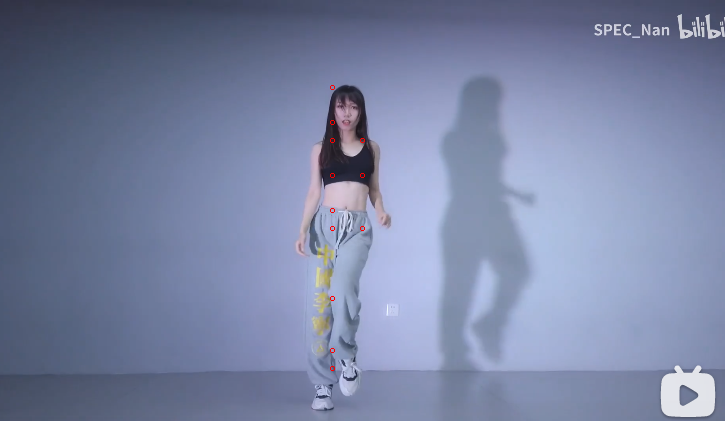

In [20]:
resimg

In [16]:
def extract_keypoints(resdata):
    if len(resdata.shape)==4:
        resdata = resdata[0]
    kps = []
    for i in range(14):
        tmpdata = resdata[:,:,i]
        pos = np.unravel_index(np.argmax(tmpdata),tmpdata.shape)
        kps.append(pos)
        #pos[0]: row,  pos[1] col
    return kps

In [17]:
def visual(imgpath, kps):
    timg = Image.open(imgpath)
    w,h = timg.size
    draw = ImageDraw.Draw(timg)
    for row, col in kps:
        row = int(row/96*h)
        col = int(col/96*w)
        draw.arc((col-2,row-2, col+2, row+2), 0,360, fill='red', width=1)
    return timg
# note its x,y/ row col coordinates;
#

In [21]:
# the initial model comes from open model's effect is a little bad;